# Data Reviewer


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from utils import data_read_dict, data_read_concat, data_merge

In [2]:
fp_data = 'data/bbg/'

In [3]:
data = data_read_dict(fp_data)

## Missing Data

In [4]:
{k: (100 * v.isna().mean().mean()).round(4) for k, v in data.items()}

{'audcad': 2.4822,
 'audjpy': 2.4824,
 'audnzd': 2.4833,
 'audusd': 2.4815,
 'euraud': 2.4822,
 'eurchf': 2.4812,
 'eurgbp': 2.4577,
 'eurjpy': 2.4811,
 'eurnzd': 2.4823,
 'eurusd': 2.4818,
 'gbpaud': 2.4832,
 'gbpcad': 2.4722,
 'gbpchf': 2.4833,
 'gbpjpy': 2.4828,
 'gbpusd': 2.4813,
 'nzdjpy': 2.4817,
 'nzdusd': 2.4812,
 'usdcad': 2.4817,
 'usdchf': 2.4813,
 'usdjpy': 2.481}

Missing data over time

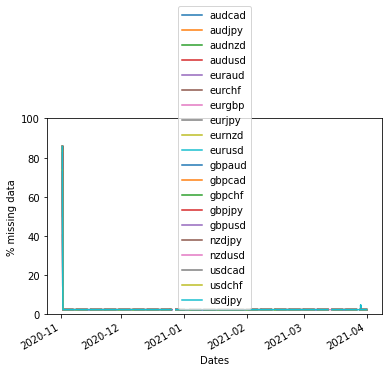

In [5]:
df = {k: (100 * v.isna().mean(axis=1)).round(4) for k, v in data.items()}
for k, v in df.items():
    v.name = k
reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how='outer'), df.values()).plot()
plt.ylabel('% missing data')
plt.ylim([0, 100])
plt.show()

Missing data by feature

Missing data by feature, with >0.1% missing values

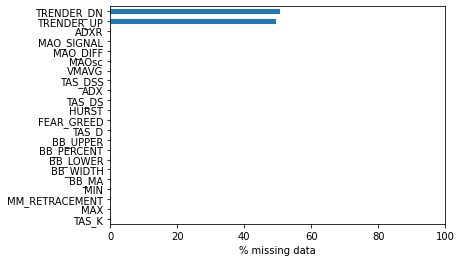

In [6]:
df = {k: (100 * v.isna().mean(axis=0)).round(6) for k, v in data.items()}
df = pd.concat(df, axis=1).mean(axis=1)
df.loc[df > 0.1].sort_values(ascending=True).plot.barh()
plt.xlim([0, 100])
plt.xlabel('% missing data')
plt.show()

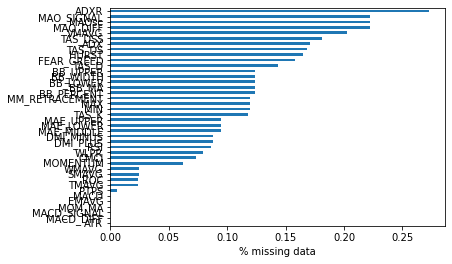

In [7]:
df.loc[df < 1].sort_values().plot.barh()
plt.xlabel('% missing data')
plt.show()

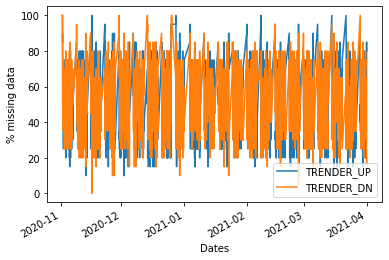

In [8]:
df_fet = pd.DataFrame({
    f: (pd.DataFrame({k: v[f] for k, v in data.items()}).isna().mean(axis=1) * 100).round(6)
    for f in list(data.items())[0][1].columns
})
df_fet.loc[:, (df > 0.5)].plot()
plt.ylabel('% missing data')
plt.show()

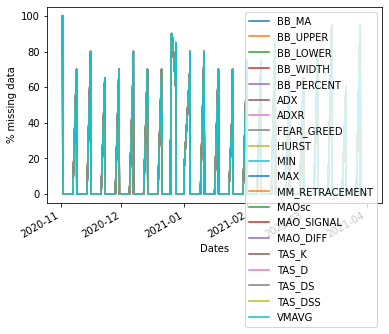

In [9]:
df_fet.loc[:, (df > 0.1) & (df < 0.5)].plot()
plt.ylabel('% missing data')
plt.show()

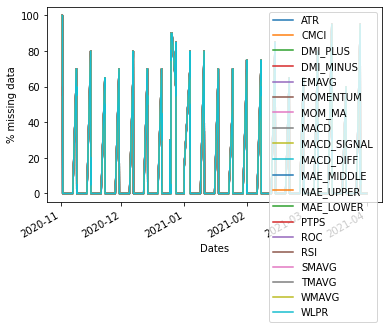

In [10]:
df_fet.loc[:, df < 0.1].plot()
plt.ylabel('% missing data')
# plt.xlim(['2020-11-06 00:00:00', '2020-11-10 00:00:00'])
plt.show()

## Missing Data after specific date

In [11]:
date = '2020-11-02 00:00:00'

In [12]:
{k: (100 * v.loc[v.index >= date, :].isna().mean().mean()).round(4) for k, v in data.items()}

{'audcad': 2.4073,
 'audjpy': 2.4104,
 'audnzd': 2.4045,
 'audusd': 2.3893,
 'euraud': 2.4012,
 'eurchf': 2.3871,
 'eurgbp': 2.4038,
 'eurjpy': 2.3871,
 'eurnzd': 2.4073,
 'eurusd': 2.3909,
 'gbpaud': 2.4214,
 'gbpcad': 2.3989,
 'gbpchf': 2.4257,
 'gbpjpy': 2.4105,
 'gbpusd': 2.3855,
 'nzdjpy': 2.4011,
 'nzdusd': 2.3862,
 'usdcad': 2.3922,
 'usdchf': 2.3921,
 'usdjpy': 2.3855}

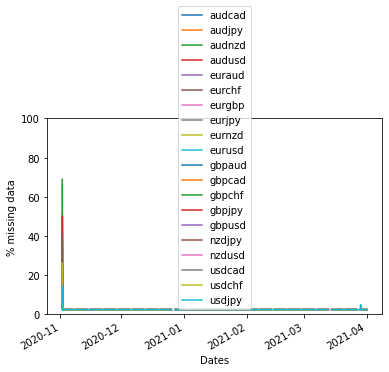

In [13]:
df = {k: (100 * v.loc[v.index >= date, :].isna().mean(axis=1)).round(4) for k, v in data.items()}
for k, v in df.items():
    v.name = k
reduce(lambda x, y: pd.merge(x, y, left_index=True, right_index=True, how='outer'), df.values()).plot()
plt.ylabel('% missing data')
plt.ylim([0, 100])
plt.show()

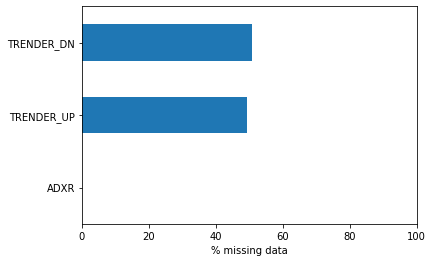

In [14]:
df = {k: (100 * v.loc[v.index >= date, :].isna().mean(axis=0)).round(6) for k, v in data.items()}
df = pd.concat(df, axis=1).mean(axis=1)
df.loc[df > 0.1].sort_values(ascending=True).plot.barh()
plt.xlim([0, 100])
plt.xlabel('% missing data')
plt.show()

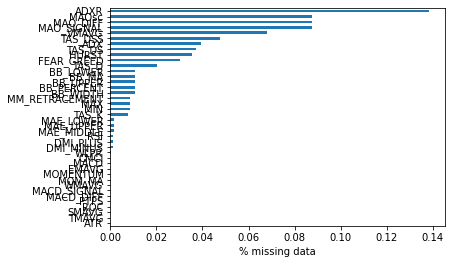

In [15]:
df.loc[df < 1].sort_values().plot.barh()
plt.xlabel('% missing data')
plt.show()

## Missing Data for variable over time

In [22]:
data = data_read_concat(fp_data)

In [17]:
na_rate = data.drop(['Dates', 'fx'], axis=1).isna().mean(axis=0)
df = data.isna().groupby(data.Dates).aggregate('mean')

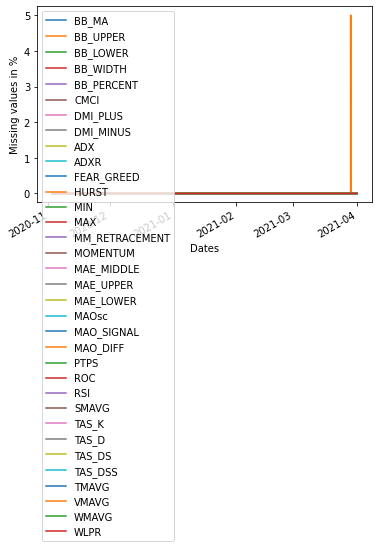

In [18]:
date = '2020-11-03 00:00:00'

(100 * df.loc[df.index >= date, na_rate[(na_rate > 0) & (na_rate < 0.01)].index.to_list()]).plot()
plt.ylabel('Missing values in %')
plt.show()

## Data Inspection

In [20]:
data = data_read_dict(fp_data)

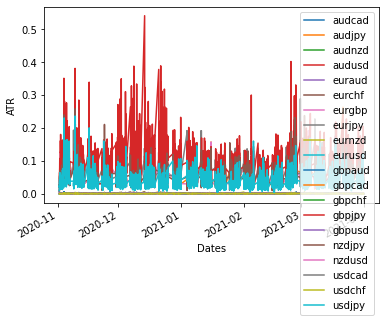

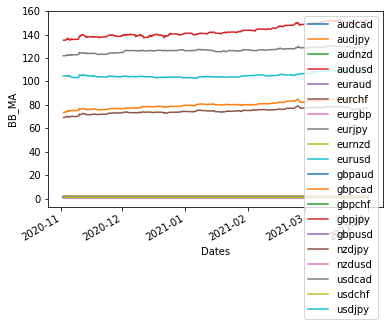

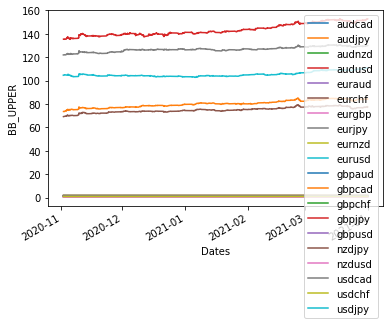

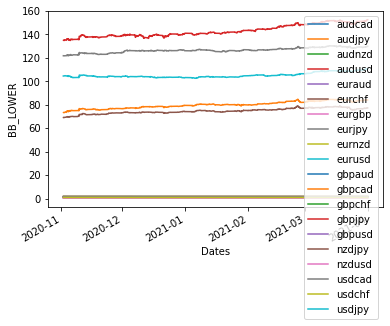

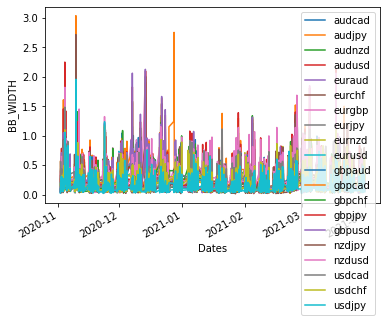

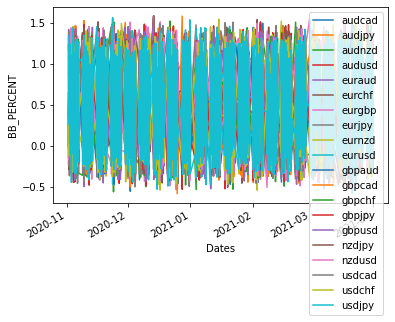

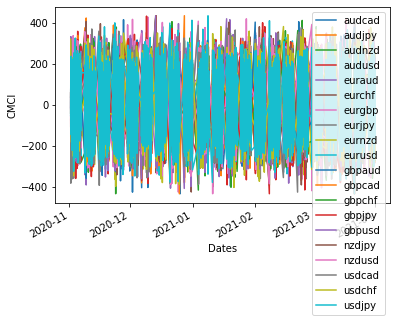

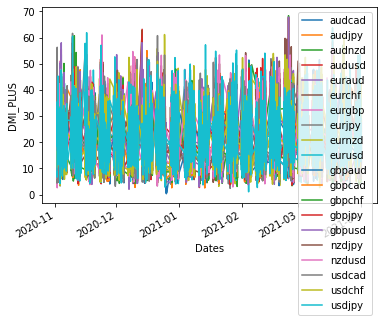

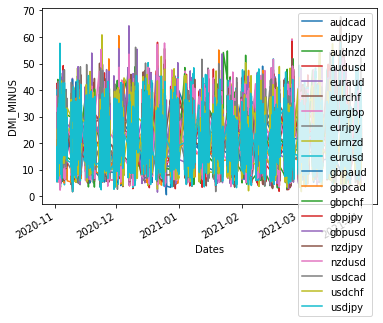

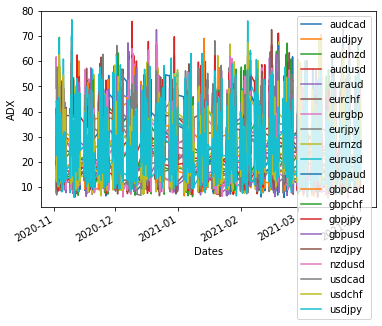

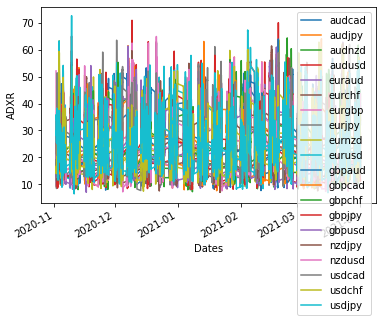

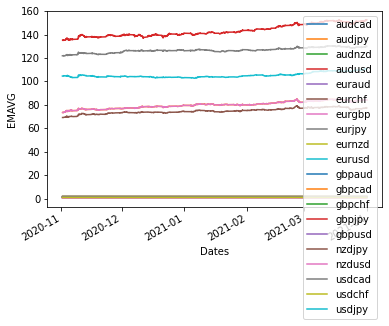

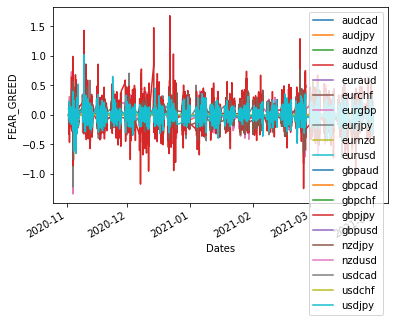

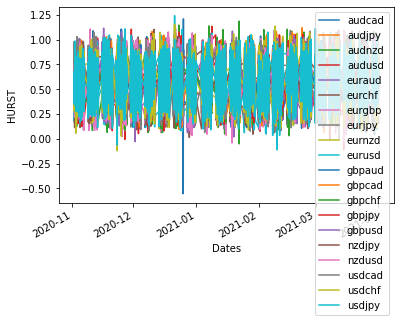

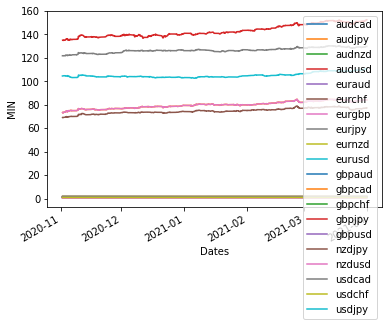

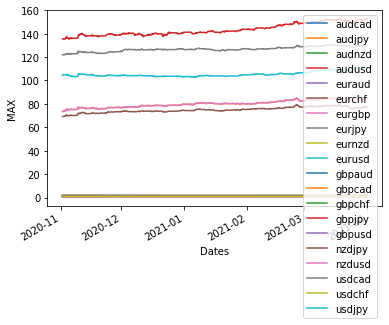

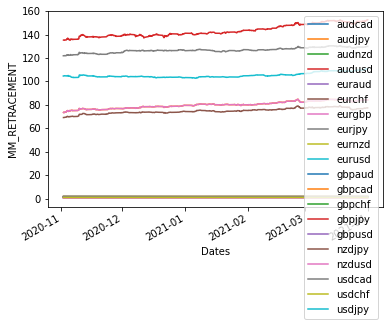

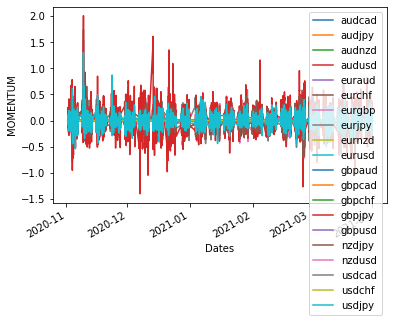

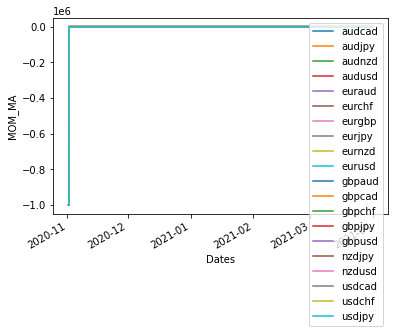

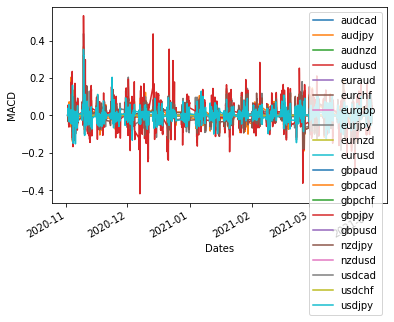

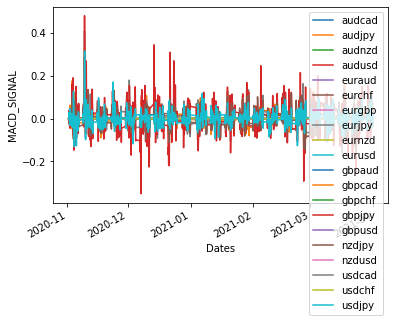

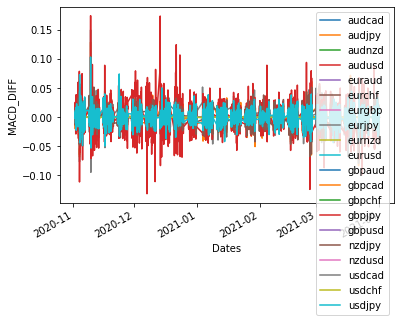

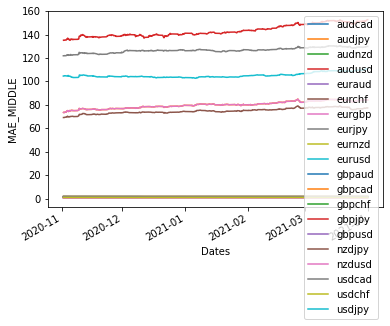

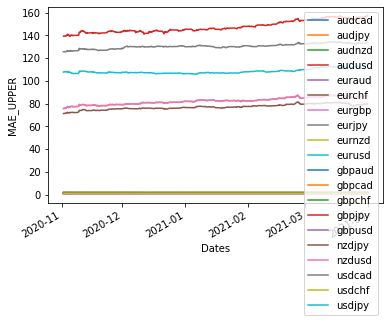

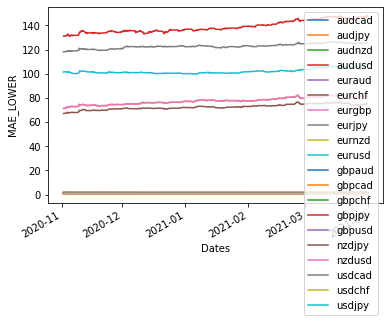

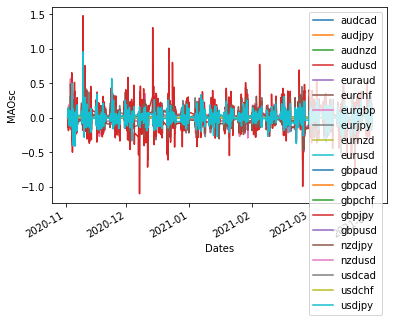

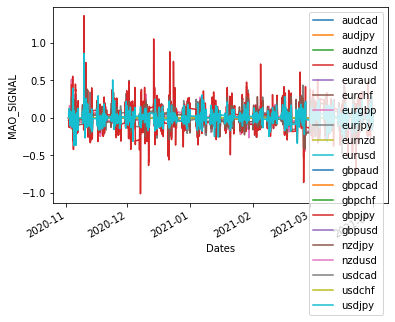

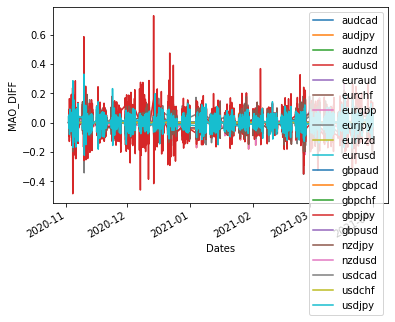

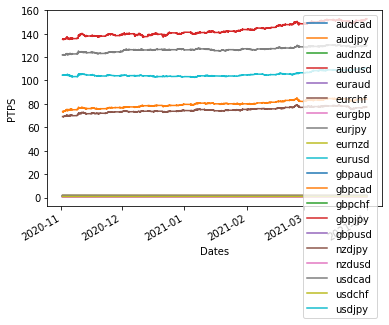

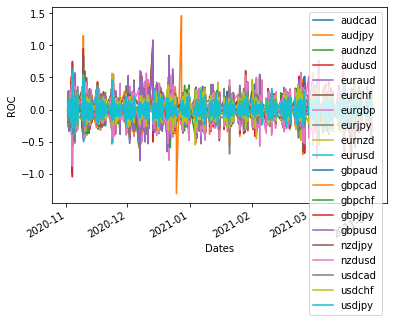

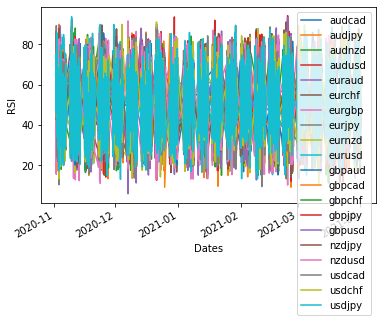

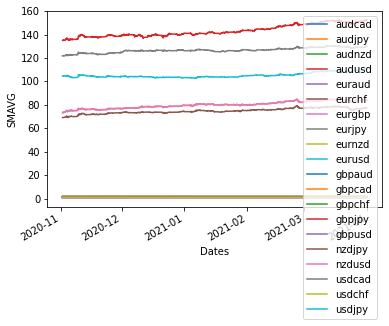

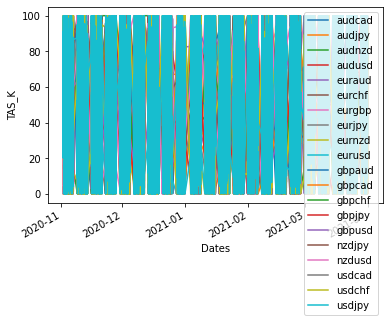

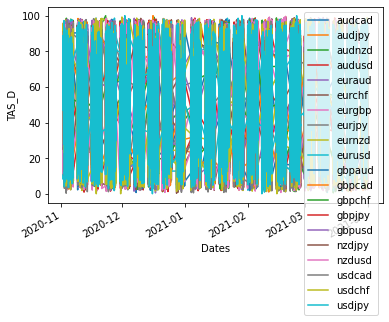

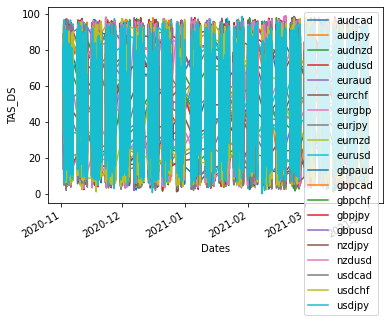

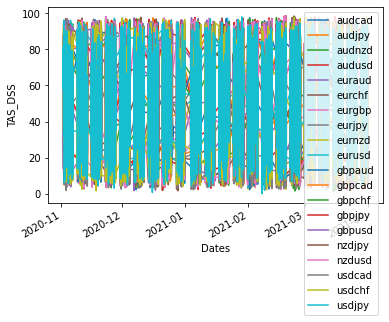

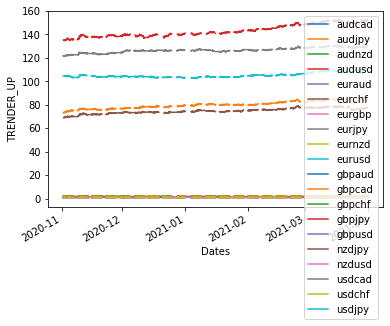

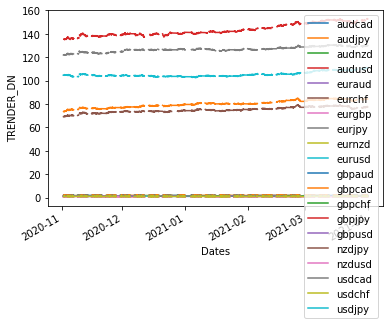

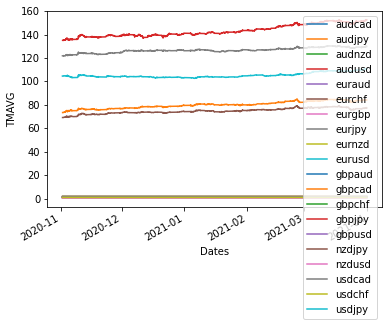

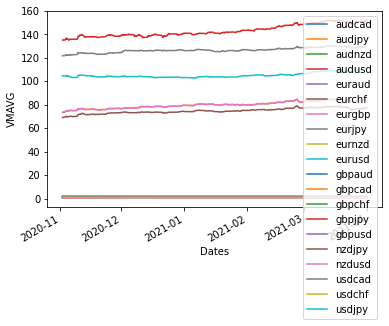

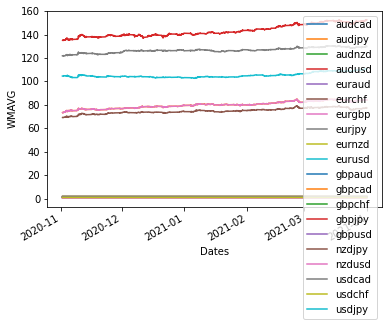

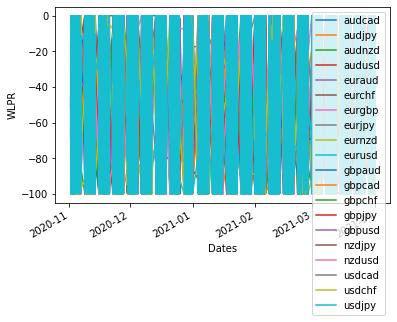

In [21]:
for c in list(data.items())[0][1].columns.to_list():
    for k, v in data.items():
        v[c].plot(label=k)
    plt.ylabel(c)
    plt.legend()
    plt.show()

## 